(sec-distPoisson)=
# Distribución de Poisson

En la {numref}`sec-distBinomial` se definió la distribución binomial como aquella que permite modelar experimentos donde la variable de interés es discreta, es decir, la forma de medir se reduce a contar el número de aciertos o resultados exitosos $x$ obtenidos en un número finito de intentos $n$, bajo la premisa de que la probabilidad de obtener un acierto en un intento era $p$. Ahora imagine que el número de intentos se hace mucho más grande que el valor esperado de aciertos ($n \gg \mu$), porque la probabilidad de un acierto se hace mucho menor que uno ($p \ll 1$). Para este caso, el cálculo de la expresión de la distribución binomial se puede volver poco manejable. Sumado a esto, se puede estar en un caso donde se desconoce la probabilidad $p$ y el número de intentos $n$, pero se conoce, o se puede estimar, el valor promedio de aciertos $\mu$, o su estimación experimental $\bar x$ para un intervalo definido. Se puede demostrar[^demo] que para este caso la distribución se puede aproximar a la expresión analítica conocida como distribución de Poisson.


[^demo]: Una demostración se puede encontrar en la sección 2.2 de {cite}`Bevington`.

(subsec-funcDensidadPoisson)=
## Función densidad de probabilidad Poisson

La función densidad de probabilidad de Poisson se define como

$$ \wp (x,\mu) = \frac{\mu^x e^{-\mu}}{x!} , $$ (ec-distPoisson)

donde $\mu$ corresponde a la media de la distribución. La variable $x$ está definida solo para valores positivos y el cero, por lo que la función no es simétrica y sólo tendrá sentido físico para valores de $x$ enteros positivos y el cero. Una característica importante de esta distribución es que solo necesita de un parámetro, la media $\mu$, porque se puede demostrar que la desviación estándar es

$$ \sigma = \sqrt \mu $$ (ec-distPoisson-dev)

En la {numref}`fig-distPoisson` podemos notar también que la media puede tomar valores no enteros y no tiene que coincidir con el valor de máxima probabilidad. No obtante, a medida que el valor de la media $\mu$ se hace grande la forma de la distribución de Poisson tiende a la forma de la distribución normal: tiende a una forma simétrica de campana con la media en el punto de mayor probabilidad.

```{figure} imagenes/distPoisson.svg
:name: fig-distPoisson

Distribución de Poisson. La curva azul corresponde a la función densidad de probabilidad de Poisson. La línea roja discontinua es dos veces la desviación estándar $\sigma$, y la línea verde discontinua marca la posición de la media $\mu$. Las barras y puntos negros señalan los valores enteros que tienen sentido físico.
```

```{admonition} ¡Hazlo tu mismo!
Si quieres cambiar los parámetros de la gráfica puedes desplegar la siguiente ventana, donde encontrarás un programa para hacerlo.
```

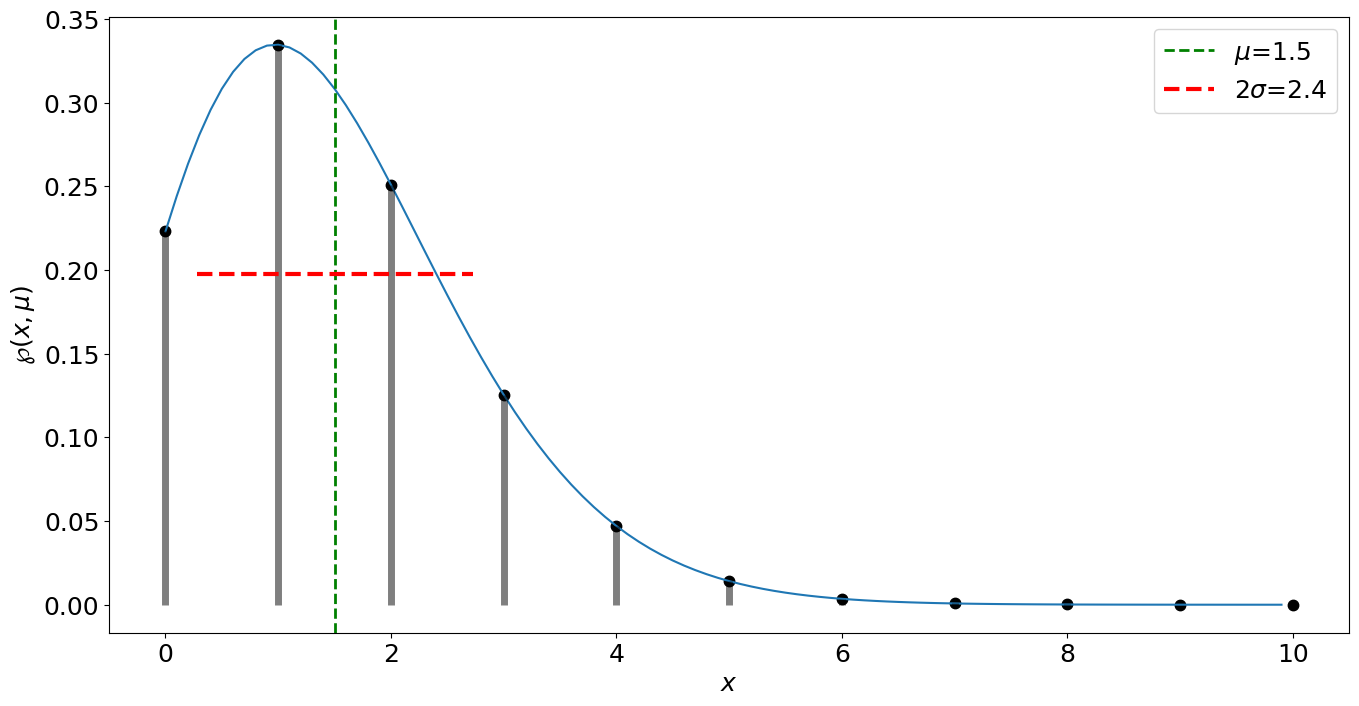

In [1]:
#### Parámetros de la distribución ###
mu = 1.5      # media aritmética
rango = 10    # valor máximo a graficar
######################################

import numpy as np
from scipy.special import factorial
import pylab as plt
plt.rcParams.update({'font.size': 18})

sigma = np.sqrt(mu)
x = np.arange(0,rango,0.1)
xdisc = np.arange(0,rango+1,1.0)

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

plt.figure(figsize=(16,8))
plt.plot(xdisc,distP(mu,xdisc),'k.',ms=15)
plt.plot(x,distP(mu,x))
plt.vlines(xdisc,0, distP(mu,xdisc), colors='k', lw=5, alpha=0.5)
plt.axvline(mu, linestyle='--', linewidth=2, c="green", label='$\mu$=%.1f'%mu)
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='$2\sigma$=%.1f'%(2*sigma))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$\wp(x,\mu)$')
plt.show()

(subsec-calProbabilidadesPoisson)=
## Cálculo de probabilidades
Conocido el valor promedio $\mu$ de la distribución para un intervalo[^intervalo] definido, la probabilidad de obtener un valor $x$ (entero positivo o el cero) es

$$\wp(x;\mu) = \frac{\mu^x e^{-\mu}}{x!} . $$ (ec-distPoissonProb) 

[^intervalo]: Note que se ha hablado de intervalo. En general, el conteo se debe hacer para el mismo intervalo. Igualmente, el promedio que se conozca, o estime, es para dicho intervalo. El intervalo más común para el tipo de problemas encontrados en física es un intervalo de tiempo.

La probabilidad de obtener valores entre $x_1$ y $x_2$ con $x_1 \leq x_2$ es

$$ P(x_1 \leq x \leq x_2) = \sum_{x=x_1}^{x_2} \frac{\mu^x e^{-\mu}}{x!} . $$ (ec-distPoissonProb2)

De la misma forma podemos calcular la probabilidad de obtener un valor igual o menor a $x_1$,

$$ P(x \leq x_1) = \sum_{x=0}^{x_1} \frac{\mu^x e^{-\mu}}{x!} , $$ (ec-distPoissonProb3)

y la probabilidad de obtener un valor mayor que $x_1$,

$$ P(x > x_1) = 1 - P(x \leq x_1) = 1 -  \sum_{x=0}^{x_1} \frac{\mu^x e^{-\mu}}{x!} . $$ (ec-distPoissonProb4)


(subsec-distPoisson-ejemplo1)=  
## Ejemplo: conteo de gotas (parte 1)
Una estudiante realiza un exprimento en el que para intervalos de $10$ segundos cuenta el número de gotas que caen sobre la pantalla de un teléfono móvil, que se encuentra a $20\,\text{cm}$ de un valde lleno de agua, sobre el que está cayendo un hilo de agua. Realiza $35$ medidas y el resultado que obtiene para cada intervalo es {4, 4, 5, 3, 1, 3, 6, 6, 2, 1, 6, 2, 1, 3, 6, 5, 7, 3, 4, 8, 6, 6, 0, 1, 2, 1, 6, 3, 4, 8, 4, 4, 2, 4, 6}. Usando las ecuaciones {eq}`media` y {eq}`devStd` encuentra que la media y desviación estándar de su distribución para un intervalo de $10$ segundos es $3.91$ y $2.15$ gotas, respectivamente. Ahora, dado que es un experimento de conteo, que la probabilidad de ocurrencia de un evento (caída de gota) es baja, y que se espera que el valor promedio (media) permanezca constante, la estudiante supone que sus datos siguen una distribución de Poisson. Vuelve entonces a determinar la desviación estándar a partir de la media y obtiene el valor de $1.98$ gotas, correspondiente a una diferencia de aproximadamente $8\,\%$, con el anteriormente obtenido. Al tener una diferencia menor al $10\,\%$ la estudiante confía en que sus datos siguen una distribución de Poisson, y realiza un grafico del histograma y la función de densidad de Poisson para hacer una verificación visual ({numref}`fig-gotasPoisson`). 

```{figure} imagenes/gotasPoisson.svg
:name: fig-gotasPoisson

Distribución de los datos de caída de gotas en un intervalo de $10$ segundos. Los puntos y barras azules corresponden a los datos experimentales. Los triángulos invertidos rojos corresponden a la distribución de Poisson para una media igual a $3.91$.
```
De la {numref}`fig-gotasPoisson` la estudiante concluye que sus datos, aunque no perfectamente, si siguen una distribución de Poisson. Esto era de esperarse porque el número total de medidas es de apenas $35$, y se trata de un proceso aleatorio. Segura de que tiene una distribución de Poisson, la estudiante ahora puede hacer predicciones como que para un intevalo de $10$ segundos hay una probabilidad de aproximadamente $20\,\%$ de que caigan tres gotas, y una probabilidad de aproximadamente $0.2\,\%$ de que caigan 11 gotas (ecuación {eq}`ec-distPoissonProb`). Usando la ecuación {eq}`ec-distPoissonProb3`, puede inferir de que existe una probabilidad de aproximadamente $80\,\%$ de que caigan hasta seis gotas, y usando la ecuación {eq}`ec-distPoissonProb4`, de que existe una probabilidad de aproximadamente $20\,\%$ de que caigan más de seis gotas. Todo para un intervalo de $10$ segundos. 

Por otro lado, si para una medición la probabilidad de que caigan 11 gotas era $\wp(11;3.91) = 0.0017$, la probabilidad de que en las $35$ mediciones caigan siempre 11 gotas es $\wp(11;3.91)^{35} = 4.3\times 10^{-98}$, es decir, para efectos prácticos es nula. En el caso extremo contrario, la probabilidad de que en las $35$ mediciones nunca caigan 11 gotas es $\big(1 - \wp(11;3.91)\big)^{35} \approx 0.94$, es decir, la probabilidad es alta y es de aproximadamente $94\,\%$. Finalmente, la estudiante encuentra que existe una probabilidad de que caigan 11 gotas en alguna de las $35$ mediciones igual a $1 - \big(1 - \wp(11;3.91)\big)^{35} \approx 0.06$, es decir, una probabilidad del $6\,\%$.

(subsec-conteo)=
## Experimento de conteo
En ocasiones se deben realizar experimentos cuya característica es que el valor de la variable de interés se obtiene a partir de contar el número de eventos ocurridos en un cierto intervalo, por ejemplo, el número de decaimientos en un material radioactivo, o, como en el ejemplo anterior, el número de gotas que caen sobre una pantalla de un teléfono móvil. Si se está seguro de que la probabilidad de ocurrencia de un evento es baja, y es aleatoria, entonces se puede decir que la distribución que sigue es de Poisson, tal que, si se mide una única vez en un intervalo de tiempo $T$, y el número de eventos obtenido es $x$, se puede decir que el promedio esperado de la variable es 

$$\mu_{m} = x \pm \sqrt x .$$ (ec-ExpConteo)

La demostración de la ecuación {eq}`ec-ExpConteo` se logra usando el principio de [máxima verosimilitud](subsec-bestEstimadores). La relación entre el promedio esperado de eventos $\mu_m$, en el intervalo de tiempo $T$, y la razón promedio de ocurrencia de los eventos $R$, o rata de cambio promedio, es 

$$\mu_m = R\times T ,$$ (ec-rataExpConteo)

por lo cual, conocida la rata de cambio promedio, podemos determinar el promedio esperado de eventos para un cierto intervalo $T$. De forma análoga, si conocemos el promedio esperado para un intervalo, entonces podemos determinar la rata de cambio promedio.

(subsec-distPoisson-ejemplo2)=  
## Ejemplo: conteo de gotas (parte 2)
Del ejemplo de la {numref}`subsec-distPoisson-ejemplo1`, un estudiante infirió desde el principio que el fenómeno estudiado correspondía a una distribución de Poisson, y por lo tanto hizo un único conteo de gotas en un intervalo dos minutos. El número de gotas que contabiliza es $x = 41$, y por lo tanto, reporta que el promedio de gotas esperado en un intervalo de dos minutos ($T=2\,\text{min}$) es de

$$\mu_{gotas} = 41 \pm 6 .$$

Pretende ahora comparar su resultado con el de la estudiante, por lo que debe determinar la razón promedio de gotas por cada $10$ segundos [^das]:

$$R_{\text{das}} = \frac{41 \pm 6}{12\,\text{das}} = (3.4 \pm 0.5)\,\text{das}^{-1} .$$

[^das]: Recuerde que $1\, \text{das} = 10\,\text{s}$, es decir, un decasegundo.

Note que el resultado del estudiante concuerda con el resultado obtenido por la estudiante, que fue de $(4 \pm 2)\,\text{das}^{-1}$ . De hecho, la medida del estudiante resulta ser mejor, lo que se puede explicar en términos de la medición del intervalo: resulta más dificil medir con precisión un tiempo de $10$ segundos que un tiempo de $120$ segundos. Por ejemplo, considerando que la incertidumbre en la medida del tiempo es de un segundo, la incertidumbre relativa, en el tiempo de la estudiante es de $10\,\%$, mientras que la del estudiante es de tan solo $0.8\,\%$.

Si el estudiante decide incluir la incertidumbre en el tiempo para el cálculo de la razón de cambio, lo primero que debe de hacer es mirar que tan importante es cada incertidumbre. Ya sabe que la incertidumbre relativa del tiempo es $0.8\,\%$, y determina que la incertidumbre relativa del valor promedio de gotas es de $15\,\%$. La incertidumbre en el promedio de gotas es casi dos órdenes de magnitud superior al del tiempo, por lo que el estudiante puede despreciar la incertidumbre en el tiempo. No obstante, verifiquemos en esta ocasión la conclusión del estudiante. La razón promedio de gotas considerando la incertidumbre en el tiempo es[^error]

[^error]: El método para determinar la incertidumbre se estudia en {numref}`sec-propagacionError`.

$$ R_{\text{das}} = \frac{41 \pm 6}{(12.0 \pm 0.1)\,\text{das}} = (3.4 \pm 0.5)\,\text{das}^{-1} . $$

La incertidumbre es la misma, luego en el intervalo de $120$ segundos la incertidumbre en el tiempo se vuelve despreciable.

Cómo conclusión, vemos que el método usado por el estudiante es más preciso, pero el de la estudiante verifica experimentalmente que sus datos siguen una distribución de Poisson.




```{seealso}
Más sobre distribución de Poisson en el capítulo 11 de {cite}`Taylor1996`, la sección 2.2 de {cite}`Bevington`, la sección 3.4 de {cite}`Hughes2010`, el apéndice D de {cite}`Squires2001` y la sección 7.3 de {cite}`GorgasGarcia2011`.

```